# 1. Descripción del problema

El problema a tratar en este informe es un problema de optimización de **el camino más corto**. El problema consiste en determinar la distancia más corta que se debe recorrer para llegar desde un nodo fuente $s$, hasta cualquier otro nodo alcanzable $v$, perteneciente a un grafo de la forma $G = (V,E)$. 

Para plantear el problema se tiene que tener un grafo que siga con la estructura antes mencionada, siendo $V$ Y $E$ los conjuntos de nodos y arcos del grafo $G$,  respectivamente. Adicionalmente a esto, los arcos que representan la unión entre nodos deberán tener un peso asociado, el cual será considerado como una distancia entre dos nodos, este peso se denotará como $l_e$. Finalmente, la mínima distancia a recorrer desde un nodo fuente a cualquier otro se denominará como $dist(s,v)$.

**Entrada:** Un grafo dirigido de la forma $G = (V,E)$, un vértice fuente o inicial $s \in V$, y un valor $l_e \geq 0$ asociado a cada arco $e ∈ E$.

**Salida**: Distancia más corta $dist(s,v)$ entre el nodo $s$ y el resto de nodos $v$.

**Tamaño del problema:** El tamaño para este problema viende definido por el tamaño de los conjuntos $V$ y $E$, esto quiere decir que mientras más nodos y arcos deban ser estudiados, el tamaño del problema se volverá más grande.

El problema aparece en distintas aplicaciones, dentro de los más comunes se encuentra el caso del transporte, como cuando se quiere llegar desde una ciudad a otra. Pero también se encuentra en otras áreas como lo son el modelamiento de reacciones químicas.

<a href="https://imgur.com/q5LjNin"><img src="https://i.imgur.com/q5LjNin.jpg" title="source: imgur.com" /></a>

A lo largo de este informe, se revisarán dos opciones de algoritmo para llegar a la solución final esperada. En primer lugar una opción mediante el algoritmo **Dijsktra**, y en segundo, el algoritmo que utiliza programación dinámica **Bellman-Ford**.

# 2. Algoritmos


## 2.1 Algoritmo Dijkstra

### 2.1.1 Descripción

Esta opción, como se mencionó anteriormente, busca recorrer cada nodo del grafo, y encontrar el camino más corto existente que conecte un nodo fuente, con cualquier otro nodo del grafo.

Este algoritmo en concreto consigue este resultado mediante el uso de dos sets de nodos. En primer lugar está el set de nodos visitados $S$, en este conjunto se irán guardando todos los nodos que han sido visitados y a su vez se haya encontrado el camino más corto que los conecte con el nodo fuente. En segundo lugar, se tendrá un conjunto de nodos $Q$, los cuales serán aquellos que no han sido visitados, y que por ende su distancia mínima desde el nodo fuente permanece desconocida. Así, el algoritmo emplea los siguientes pasos:

**1**: Se recorrerá en una primera instancia el grafo, y se le añadirá un valor de referencia a cada nodo, el cual significará la distancia mínima encontrada desde la fuente hasta ese vértice en particular. Este valor inicial será $∞$, para asegurarnos que el valor de la distancia mínima que se encuentre sea siempre el menor. Esto para todos los nodos excepto para la fuente, la cual se inicializará con $0$, debido a que no existe un camino que conecte a este nodo con sí mismo.

**2:** Elegir un nodo cuya conexión sea la de menor valor encontrado hasta el momento, este nodo se marcará como visitado y se agregará al conjunto $S$.

**3:** Se actualizarán los costos de referencia para cada nodo adyacente al recién agregado al conjunto $S$ mediante el siguiente criterio. Para cada conexión entre un nodo $n$ y otro $m$, siendo $m \in Q$, si $dist(s, n) + dist(n, m) < dist(s, m)$, se actualizará el valor de referencia de $m$ a el valor de $dist(s, n) + dist(n, m)$.

Lo anterior quiere decir que si las sumas de las distancias recorrridas hasta llegar al nodo $m$, incluida la distancia de $m$ con su antecesor $n$, es menor a la que se tenía registrada para $m$, entonces el algoritmo actualizará la menor distancia encontrada para el nodo $m$.

**4:** Repetir los pasos $2$ y $3$ hasta visitar todos los nodos del grafo.

Para la implementación anteriormente mencionada se utilizará una clase `graph` para manejar nuestro grafo, además de una cola de prioridad. Ambos funcionamientos se encuentran explicados en el código a continuación.

Finalmente, es importante mencionar que este algoritmo no acepta grafos con cilos negativos de la siguiente forma:

<a href="https://imgur.com/qJste3p"><img src="https://i.imgur.com/qJste3p.jpg" title="source: imgur.com" /></a>

En la imagen se observan varios arcos que tienen un peso negativo, sin embargo en rojo vemos destacado un conjunto de arcos que forman en primer lugar un ciclo, y en él, la suma de las distancias es negativa. Bajo esta primicia es que el algoritmo no funciona, debido a que no es posible hablar de un "camino más corto" cuando existen pesos negativos. Además, para que el algoritmo considere arcos negativos habría que habilitarle una opción para que pueda visitar más de una vez un nodo, perdiéndo así rapidez y eficiencia.

### 2.1.2 Código

In [123]:
from queue import PriorityQueue

#Clase grafo, utiliza una matriz de adyacencia donde si existe una conexión 
#entre un nodo u y v se coloca un número en las posiciones (u,v) y (v,u) 
#de la matriz, ese número es la distancia que existe entre esos respectivos nodos
class Graph:

    #Constructor que recibe la cantidad de vértices a ingresar y en base a eso crea la matriz de adyacencia
    def __init__(self, num_of_vertices):
        self.v = num_of_vertices
        self.edges = [[-1 for i in range(num_of_vertices)] for j in range(num_of_vertices)] #Matriz de adyacencia
        self.visited = [] #Lista de nodos visitados

    #Función que agrega conexiones, recibe por parámetros dos nodos u y v además de una distancia 
    #luego inserta la distancia entregada en las posiciones correspondientes de la matriz de adyacencia
    def add_edge(self, u, v, weight):
        self.edges[u][v] = weight
        self.edges[v][u] = weight

    #Función que recibe una lista de conexiones de la forma (nodo a, nodo b, peso)
    #y añade las conexiones al grafo
    def add_edges(self, tupla):
      for a in tupla:
        self.add_edge(a[0], a[1], a[2])

#Algoritmo Dijkstra para el problema del camino más corto
def dijkstra(g, start_vertex, nodos):
    
    graph = Graph(nodos)
    graph.add_edges(g)
    
    #Se crea abecedario que guarda la menor distancia desde la fuente 
    #para cada nodo v perteneciente a la lista
    S = {v:float('inf') for v in range(graph.v)}  #Se inicializa cada valor en infinito
    S[start_vertex] = 0  #Se inicializa el valor del nodo fuente en 0

    #Se inicializa cola de prioridad, para que los nodos se ordenen automáticamente
    #de menor a mayor lejanía con respecto al nodo fuente
    Q = PriorityQueue()
    Q.put((0, start_vertex))

    #Mientras la cola no esté vacía, es decir mientras existan nodos no visitados
    while not Q.empty(): 
        (dist, current_vertex) = Q.get()  #Se saca el nodo con menor distancia de la cola
        graph.visited.append(current_vertex) #Se agrega a la lista de nodos visitados

        #Se recorren los nodos adyacentes al nodo actual
        for neighbor in range(graph.v):
            if graph.edges[current_vertex][neighbor] != -1:
                distance = graph.edges[current_vertex][neighbor] #En caso de existir conexión, se obtiene la distancia(nodo actual, nodo adyacente)

                #Si el nodo no ha sido visitado y su nueva distancia es menor a la que se tenía registrada, se actualiza su menor distancia encontrada
                if neighbor not in graph.visited: 
                    old_cost = S[neighbor]
                    new_cost = S[current_vertex] + distance
                    if new_cost < old_cost:
                        Q.put((new_cost, neighbor))
                        S[neighbor] = new_cost
                        
    #Se retorna lista que contiene las menores distancias encontradas desde el nodo fuente al resto de nodos
    return S 

graph = [[0, 1, 4], [0, 7, 8], [1, 7, 11],
        [1, 2, 8], [2, 8, 2], [2, 3, 7],
        [2, 5, 4], [3, 5, 14],[3, 4, 9],
        [5, 4, 10],[6, 5, 2],[7, 6, 1],
        [7, 8, 7],[6, 8, 6]]

D = dijkstra(graph, 0, 9)

print(D)

{0: 0, 1: 4, 2: 12, 3: 19, 4: 21, 5: 11, 6: 9, 7: 8, 8: 14}


Las variables relevantes son:

* `num_of_vertices`, cantidad de nodos del grafo.
* `edges`, matriz de adyacencia que guarda las conexiones del grafo.
*`visited`, lista de nodos visitados.
*`S`, lista que asocia cada nodo con su menor distancia encontrada, es la que se retorna al final del algoritmo.
*`Q`, Cola de prioridad que almacenará cada nodo no visitado anteriormente y los mantendrá ordenados por sus distancias.


### 2.1.3 Ejemplo

Para el ejemplo utilizado en el código anteriormente mencionado, se entrega a la función una lista de $14$ conexiones iniciales del grafo, de esta forma luego de agregarlas a la clase `graph` nos queda un grafo de la siguiente forma:

<a href="https://imgur.com/q5LjNin"><img src="https://i.imgur.com/q5LjNin.jpg" title="source: imgur.com" /></a>

Luego de llamar a nuestro algortimo, se marcará como visitado el nodo $0$, el cual tendrá una distancia asociada de $0$. Después de esto se procede a añadir sus nodos adyacentes $1$ y $7$ a la cola de prioridad y se actualizarán sus menores distancias encontradas debido a que $0 + 4 < ∞$ y $0 + 8 < ∞$.

<a href="https://imgur.com/Zm3Fqbl"><img src="https://i.imgur.com/Zm3Fqbl.jpg" title="source: imgur.com" /></a>

Se escogerá a continuación el nodo con menor distancia ($1$, con distancia $4$), se marcará como visitado. Posteriormente se agregarán sus nodos adyacentes a la cola de prioridad.

<a href="https://imgur.com/SaMVFqG"><img src="https://i.imgur.com/SaMVFqG.jpg" title="source: imgur.com" /></a>

Para este caso algo interesante es que al agregar los nodos adyacentes de $1$, se agrega el nodo $7$ nuevamente pero con una distancia de $0 + 4 + 11 = 15$ y esto es menor a la ya registrada anteriormente $8$, por lo cual en este caso la menor distancia encontrada para el nodo $7$ no se actualiza. 

Posteriormente se observa que el siguiente nodo a estudiar es el $7$, debido a que ingresó primero y es el siguiente con menor distancia registrada $8$, se marcará como visitado y se agregarán sus nodos adyacentes.

Finalmente repitiendo el algoritmo se llegará al siguiente grafo y lista de distancias:

<a href="https://imgur.com/fLjAWMf"><img src="https://i.imgur.com/fLjAWMf.jpg" title="source: imgur.com" /></a>

La tabla que aparece al final de la imagen es fácilmente comprobable recorriendo los caminos marcados en el grafo y sumando cada peso de cada arco a medida que avanzamos hacia algún nodo en específico desde la fuente.

## 2.2 Algoritmo Bellman-Ford



### 2.2.1 Descripción



Para esta opción, se aplicará el paradigma de **programación dinámica**, el cual consiste en dividir un problema de tamaño $n$, en una cierta cantidad de sub-problemas de tamaño $m < n$, los cuales deberían ser relativamente más "fáciles" de solucionar que el problema original. Posteriormente  se almacenan las resoluciones de cada uno de estos en una tabla, la cual es consultada cuando para resolver un sub-problema $a$ sea necesario un resultado de un sub-problema $b$ previamente calculado. 

Adicionalmente a esto, se tiene que esta segunda opción utiliza la programación dinámica con una planificación **bottom-up**, es decir que va solucionando los problemas de menor tamaño, y guarda sus resoluciones para que sean ocupadas para resolver los sub-problemas de mayor tamaño.

Para este problema en específico la cantidad de sub-problemas a resolver depende de la cantidad de conexiones entre nodos a analizar.

Es importante recalcar que este algoritmo permite detectar ciclos negativos en el grafo, característica que no tiene el algoritmo Dijkstra.

Este algoritmo funciona bajo la lógica de que para cualquier nodo perteneciente al grafo y alcanzable desde el nodo fuente, existe una cantidad $i$ de arcos que se pueden recorrer para llegar al nodo de destino. Por lo cual, el camino más corto para llegar desde $s$ hasta $v$ estará determinado por estas dos opciones:

**1.** Se deberán recorrer $i-1$ arcos o menos para llegar al nodo $v$.

**2.** Se deberá recorrer la cantidad máxima de arcos $i$ para llegar al nodo $v$.

Es utilizando esta lógica que el algoritmo recorre $i$ veces el grafo, analizando todas las conexiones presentes, aumentando en cada iteración la cantidad de arcos que se "permitirían" recorrer para llegar a un nodo determinado $v$ desde la fuente. El algoritmo consigue llegar a la solución óptima para una ruta de tamaño máximo $L$, encontrando previamente las soluciones óptimas para rutas de tamaño menores a $L$.

Para lograr este funcionamiento, el algoritmo realiza los siguientes pasos:

**1.** Se crea una lista `dis`, que almacene las menores distancias encontradas desde el nodo $s$ hasta cualquier nodo $v$, los índices de esta lista representarán el nodo de destino y los valores que contenga la lista serán los caminos más cortos. Al comienzo del algoritmo, estas distancias se inicializarán con el valor $∞$, a excepción del primer nodo que como se mencionó anteriormente, tiene trivialmente una distancia de $0$ a sí mismo.

**2.** Se calcularán las distancias más cortas $V-1$ veces, siendo $V$ la cantidad de nodos del grafo. Para cada iteración $i$, se calcularán las menores distancias para los nodos cuyos caminos desde la fuente tengan una cantidad de a lo más $i$ arcos. Es por esto que se repite $V-1$ veces, debido a que se asume que la cantidad máxima de arcos por recorrer para llegar a cualquier nodo del grafo es $V-1$.

En este paso se actualizará en cada iteración el valor que se guarde en la lista `dis` bajo el siguiente criterio: 

* Para cada conexión $(u,v)$ con peso $w$, si `dis[v] > dis[u] + w(u,v)`, el valor `dis[v]` se actualizará a `dis[u] + w(u,v)`.

**3.** El paso $2$ funcionará correctamente asumiendo que no existen ciclos negativos dentro del grafo, es por esto que el paso $3$ analiza nuevamente cada conexión del grafo, y en caso de que se siga cumpliendo la condición `dis[v] > dis[u] + w(u,v)`, se determinará que se está en presencia de un ciclo negativo, con lo cual se dará un aviso y el algoritmo terminará su ejecución.


### 2.2.2 Código

In [102]:
from networkx.classes.function import get_edge_attributes
from networkx.drawing.nx_pylab import spring_layout
from sys import maxsize
import networkx as nx

def BellmanFord(graph, V, E, src, verbose = False): 
    # Se inicializa la distancia de todos los nodos como infinito
    dis = [maxsize] * V
 
    # Se inicializa distancia a la fuente como 0
    dis[src] = 0
    flag = True
    #Para cada camino con a lo más i arcos, se calcula el camino más corto 
    for i in range(V - 1):
        if verbose == True:
          print("\n-----ANALIZANDO RUTAS DE A LO MÁS:", i+1, "ARCOS DESDE LA FUENTE-----\n")
        for j in range(E):
            if verbose == True:
                  print("-----ESTADO ACTUAL DE TABLA DE DISTANCIAS-----")

                  print("Nodo\t\tCamino más corto desde la fuente")
                  for k in range(V):
                    print("{0}\t\t{1}".format(k, dis[k]))

                  print("Analizando arco: \033[34m(", graph[j][0], ",", graph[j][1], ") \033[0mcon peso: \033[35m", graph[j][2], "\033[0m")     
        #En caso de cumplirse la condición, se actualiza la lista con los caminos más cortos
            if dis[graph[j][0]]!= maxsize and dis[graph[j][0]] + graph[j][2] < dis[graph[j][1]]:
                if verbose == True:
                  print("NUEVA RUTA MÁS CORTA ENCONTRADA PARA NODO:\033[92m", graph[j][1]) 
                  print("\033[0m\033[34mVALOR HASTA NODO", graph[j][0], "\033[34m:", dis[graph[j][0]], "\033[0m+ \033[35mPESO DEL ARCO:", graph[j][2], "\033[0m=\033[92m", dis[graph[j][0]] + graph[j][2])
                  print("\033[0m")
                dis[graph[j][1]] = dis[graph[j][0]] + graph[j][2]

    #Ultimo paso para comprobar si existen ciclos negativos dentro del grafo
    for i in range(E):
        x = graph[i][0]
        y = graph[i][1]
        weight = graph[i][2]
        if dis[x] != maxsize and dis[x] + weight < dis[y]:
            print("El grafo contiene un ciclo negativo")
            return dis.clear()

    return dis

def graph_to_nxgraph(graph):
  nxgraph = nx.Graph()
  for i in graph:
    nxgraph.add_edge(i[0], i[1], weight=i[2])
  return nxgraph
 
V = 5 # Número de vértices en el grafo

graph = [[0, 1, -1], [0, 2, 4], [1, 2, 3],
        [1, 3, 2], [1, 4, 2], [3, 2, 5],
        [3, 1, 1], [4, 3, -3]]

verbose = False

dis = BellmanFord(graph, V, len(graph), 0, verbose)

print(dis)

[0, -1, 2, -2, 1]


Las variables relevantes son:

* `dis`: Es la lista que guardará los caminos más cortos para cada nodo del grafo, los índices denotarán el nodo y el valor asociado al índice será el camino más corto para llegar a él.

* `i` (primer ciclo): Representará la cantidad máxima de arcos que se considerarán en cada iteración para llegar a los distintos nodos del grafo.

* `i` (segundo ciclo): Para el último paso revisará cada conexión en busca de ciclos negativos.

* `V`: Cantidad de nodos en el grafo.

* `E`: Cantidad de arcos en el grafo.

* `src`: Nodo del grafo que se considerará como fuente.

### 2.2.3 Ejemplo

En el presente ejemplo se representará el grafo utilizado para el ejemplo, además de una tabla en la cual se muestra la evolución de los valores de las distancias más cortas encontradas para los distintos nodos del árbol.

<a href="https://imgur.com/YHgrTYM"><img src="https://i.imgur.com/YHgrTYM.jpg" title="source: imgur.com" /></a>

Para $i = 0$, se analizarán todas las conexiones que tengan a lo más $0$ arcos, es decir, solo se considerará el camino más corto que conecte a la fuente con sí misma, con lo cual el resto de nodos guardarán un valor $\infty$.

Siguendo con $i = 1$, vemos cómo se analizan los caminos con a lo más $1$ arco, las principales conexiones son $(0,1)$ cuyo peso es $-1$, y se guarda como el camino más corto que conecta la fuente con el nodo $1$. Además se considera la conexión $(0,2)$ con peso $4$, y se guarda también como el camino más corto. Sin embargo en este paso ocurre una segunda actualización, debido a que se considera el camino $(1,2)$ que solo tiene un arco de tamaño $3$, el cual como se mencionó anteriormente, se suma al valor del camino más corto almacenado en el nodo $1$ y se compara con el valor almacenado en $2$, con esto tenemos que $-1 + 3 = 2 < 4$, por lo que el valor `dis[2]` se actualiza a $2$.

Para el paso $i = 2$ se buscan los caminos más cortos posibles para las rutas que contengan a lo más dos arcos, y en caso de ser un camino más corto que el que tengan guardados los nodos, se actualiza. Este es el caso de los nodos $3$ y $4$, los cuales pasan de tener el valor $\infty$ a $1$, esto es debido a que se consideran las rutas $(0,1,3)$ y $(0,1,4)$, sin embargo, existe un camino de dos arcos que se considera también que es $(0,1,4,3)$, el cual, si bien es un camino que tiene $3$ arcos desde el nodo $v$ hasta la fuente, contiene $2$ arcos entre el nodo $1$ y $3$, por lo cual se actualiza en esta iteración, y se cambia el valor $1$ con el valor de $-2$.

Como se mencionó anteriormente, el algoritmo continúa estudiando los arcos $V-1$ veces más, sin embargo, no se encuentra una menor distancia que las ya encontradas hasta el momento, por lo cual la salida final de nuestro algoritmo corresponde a la última fila de la tabla, es decir la lista `[0,-1,2,-2,1]`

### 2.2.4 Ejecución con opción verbose

In [107]:
import random

def is_valid_edge(generated_edges: dict, i: int, j: int):
    return i != j and not generated_edges.get((i, j), None) and not generated_edges.get((j, i), None)

def instance_generator(n: int):
    """
        Input: cantidad de vértices
        Output: una lista que contiene todos los arcos y el número del vértice fuente (la función retorna dos variables).
        Los arcos vienen en la forma (i, j, weight), donde i es el vértice origen del arco y j el vértice al que apunta el arco, mientras que weight es su peso.
    """
    graph = []
    nodes = random.sample(range(0, n), n)
    unvisited_nodes = random.sample(range(0, n), n)
    
    generated_edges = {}
    for i in nodes:
        rand = random.sample(nodes, random.randint(1, 3))

        for j in rand:
            edge = (i, j)
            edge_with_weight = (i, j, random.randint(1, 100))
            
            if generated_edges.get((edge[1], edge[0]), None):
                continue
            
            if i == j:
                new_vertice = None
                iterations = 0
                while new_vertice is None and iterations < 250:
                    iterations += 1
                    number = random.randint(0, n - 1)
                    if is_valid_edge(generated_edges, i, number):
                        new_vertice = number

                if iterations >= 250:
                    return instance_generator(n)
                
                edge = (i, new_vertice)
                edge_with_weight = (i, new_vertice, random.randint(-25, 100)) # -25 y 100 corresponde a los límites de los pesos, puede cambiarlos.
            
            graph.append(edge_with_weight)
            generated_edges[edge] = edge

            if edge_with_weight[1] in unvisited_nodes:
                unvisited_nodes.remove(edge_with_weight[1])

    for i in unvisited_nodes:
        valid_edge = False
        iterations = 0
        while not valid_edge and iterations < 250:
            iterations += 1
            m = random.randint(0, n - 1)
            if is_valid_edge(generated_edges, m, i):
                valid_edge = True
                edge = (m, i)
                edge_with_weight = (m, i, random.randint(-25, 100)) # -25 y 100 corresponde a los límites de los pesos, puede cambiarlos.
                graph.append(edge_with_weight)
                generated_edges[edge] = edge

        if iterations >= 250:
            return instance_generator(n)

    return graph, graph[0][0]

V = 5

graph, src = instance_generator(V)

verbose = True

dis = BellmanFord(graph, V, len(graph), src, verbose)

if verbose == True:
  print("\n-----LISTA FINAL DE VALORES-----")
  print("Nodo\t\tCamino más corto desde la fuente")
  for k in range(V):
                  print("{0}\t\t{1}".format(k, dis[k]))
else:
  print(dis)


-----ANALIZANDO RUTAS DE A LO MÁS: 1 ARCOS DESDE LA FUENTE-----

-----ESTADO ACTUAL DE TABLA DE DISTANCIAS-----
Nodo		Camino más corto desde la fuente
0		0
1		9223372036854775807
2		9223372036854775807
3		9223372036854775807
4		9223372036854775807
Analizando arco: ( 0 , 3 ) con peso:  88 
NUEVA RUTA MÁS CORTA ENCONTRADA PARA NODO: 3
VALOR HASTA NODO 0 : 0 + PESO DEL ARCO: 88 = 88

-----ESTADO ACTUAL DE TABLA DE DISTANCIAS-----
Nodo		Camino más corto desde la fuente
0		0
1		9223372036854775807
2		9223372036854775807
3		88
4		9223372036854775807
Analizando arco: ( 0 , 1 ) con peso:  78 
NUEVA RUTA MÁS CORTA ENCONTRADA PARA NODO: 1
VALOR HASTA NODO 0 : 0 + PESO DEL ARCO: 78 = 78

-----ESTADO ACTUAL DE TABLA DE DISTANCIAS-----
Nodo		Camino más corto desde la fuente
0		0
1		78
2		9223372036854775807
3		88
4		9223372036854775807
Analizando arco: ( 0 , 4 ) con peso:  36 
NUEVA RUTA MÁS CORTA ENCONTRADA PARA NODO: 4
VALOR HASTA NODO 0 : 0 + PESO DEL ARCO: 36 = 36

-----ESTADO ACTUAL DE TABLA 

En este caso, se puede observar cómo el código va arco por arco buscando rutas óptimas y actualizando los valores en caso de encontrar alguna, entregando finalmente la lista de menores distancias. Además se indica progresivamente la cantidad máxima de arcos que se están considerando en cada iteración

### 2.2.5 Ejecución con opción visualize

Esta opción sirve para mostrar el grafo sobre el cual se está trabajando.

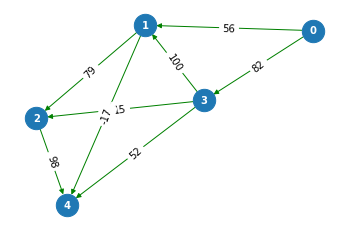

In [89]:
V = 5

graph, src = instance_generator(V)

visualize = True

if visualize == True:
  G = graph_to_nxgraph(graph)
  pos = nx.spring_layout(G, k = 2.0)
  nx.draw_networkx_edge_labels(G,pos,edge_labels=get_edge_attributes(G, "weight"),label_pos=0.5,font_size=10)
  nx.draw(G,pos, arrows = True, with_labels=True, node_size=500, font_color="white", font_size=10, font_weight="black", width  =1.0, edge_color ="green")

dis = BellmanFord(graph, V, len(graph), 0, verbose)

# 3. Propidades del algoritmo

## 3.1 Correctitud

### 3.1.1 Correctitud del algoritmo Bellman-Ford

**Sub-estructura óptima**

La sub-estructura óptima de este problema viene dada por la condición mencionada anteriormente, y es que el algoritmo utiliza la lógica de que para cualquier nodo $v$, el camino más corto desde la fuente $dist(s,v)$, recorrerá una cantidad $i-1$ de **arcos** o menos, o por el contrario, deberá recorrer la cantidad máxima $i$ de **arcos** presentes en el grafo, de esta manera la subestructura óptima queda de la siguiente manera:

<a href="https://imgur.com/JpsoYZX"><img src="https://i.imgur.com/JpsoYZX.jpg" title="source: imgur.com" /></a>

**Función recurrente**

En este sentido, utilizando lo explicado en el punto anterior, tenemos que la función recurrente para este problema es la siguiente:

1. Para el inicio del problema, la función será la siguiente:
\begin{equation}
L_{(0,v)} = \begin{cases}
  0  & \text{si s = v} \\
  \infty & \text{en otro caso}
\end{cases}
\end{equation}

2. Para el resto del algoritmo, se utilizará la siguiente ecuación:
\begin{equation}
L_{(i,v)} = \text{min}
\begin{cases}
  L_{i-1,v} \\
  min_{(w,v) \in E}  \{ L_{i-1,w} + l_{w,v} \}
\end{cases}
\end{equation}

Estas ecuaciones nos indican básicamente lo anteriormente mencionado en la subestructura óptima, es decir que para el incio se inicializarán los valores en $0$ e infinito, y que posteriormente, para encontrar la distancia de cada nodo, se buscará la menor opción entre recorrer una cantidad de arcos $i$, o bien recorrer una cantidad de arcos $i-1$ hasta un nodo intermedio $w$, para luego sumarle la distancia entre $w,v$, y así obtener nuestro camino más corto.

Teniendo en cuenta estos dos componentes de función de recurrencia y subestructura óptima, podemos plantear la siguiente hipótesis de correctitud:

**Teorema**
Dado un grafo de la forma $G = (V,E)$, el algoritmo Bellman-Ford para el problema del camino más corto encuentra el camino más corto $dist$ desde un nodo fuente $s$ hasta cualquier nodo $v \in V$

**Hipótesis**
Luego de cada iteración $i$, para cada nodo $v\in V$, $D[v,i]$ es el largo más pequeño de ruta desde el nodo $s$ hasta $v$ considerando a lo más $i$ arcos.

Para comprobar la hipótesis se utilizará inducción.

**Caso base**

Para este caso se utiliza la primera ecuación anteriormente mencionada, así, tenemos que para la primera iteración, cuando $i = 0$, $D[s,0] = 0$ y $D[v,0] = ∞$ esto es trivialmente correcto y comprobable debido a que el único nodo alcanzable recorriendo $0$ arcos, es el mismo nodo fuente. Para el resto de nodos, no son alcanzables recorriendo $0$ arcos, con lo cual se les deja una constante infinita.

**Paso inductivo**

Para el resto de casos, partimos desde la primicia que el algoritmo funciona correctamente para cualquier problema de tamaño menor o igual a $i$, con lo cual se observará qué ocurre para $i+1$.

Sea $v$ un nodo perteneciente a $V$, se asume que existe un camino más corto que une a $s$ con $v$. Con lo anterior, se define que $u$ es el nodo antecesor a $v$ en la ruta. Debido a la propiedad mencionada anteriormente, se sabe que $D[u,i]$ es el camino más corto desde $s$ a $u$ con una cantidad de a lo más $i$ arcos, con lo cual $D[v,i+1] \leq D[u,i] + w(u,v)$ debido al paso de reajuste del algoritmo, esta menor distancia será mayor o igual al largo de la ruta más corta entre $s$ y $v$, utilizando a lo menos $i+1$ arcos, en caso contrario se estaría en presencia de una contradicción, ya que sabemos que el algoritmo realiza una búsqueda exhaustiva para encontrar la menor de todas las posibles rutas. Es así como finalmente se comprueba que $D[v,i+1]$ es la ruta con menor distancia que conecta $s$ con $v$ recorriendo a lo más $i+1$ arcos.

## 3.2 Tiempo de ejecución de algoritmo Bottom-up

Con respecto a la cantidad de subproblemas del algoritmo, el algoritmo Bellman-Ford resuelve una cantidad de $(n+1) * n = O(n^2)$ subproblemas, donde $n$ es la cantidad de nodos presentes en el grafo.

Finalmente para determinar el tiempo de ejecución del algoritmo, basta con analizar que el algoritmo analiza los arcos uno por uno es decir la cantidad $E$ de arcos, esto lo hace $V-1$ veces, siendo $V$ la cantidad de nodos del grafo, con lo cual el tiempo de ejecución del algoritmo sería $E * V-1 = O(V*E)$.


# 4. Experimentos

## 4.1 Comparación entre alternativas

En el siguiente experimento se ilustrará cómo se comportan los tiempos de ejecución de cada alternativa para resolver el problema (Dijkstra/Bellman-Ford).

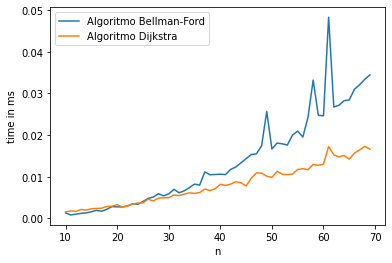

In [125]:
import matplotlib.pyplot as plt
import datetime
import random
from timeit import repeat
import numpy as np

x = []; y1 = [] ; y2 = []

for n in range(10,70):

  graph, src = instance_generator(n)

  t = repeat(setup="from __main__ import BellmanFord", stmt=f"BellmanFord({graph}, {n}, {len(graph)},{src})", repeat=1, number=10)
  j = repeat(setup="from __main__ import dijkstra, Graph", stmt=f"dijkstra({graph}, {src}, {n})", repeat=1, number=10)  

  x.append(n)
  y1.append(t)
  y2.append(j)


plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["Algoritmo Bellman-Ford", "Algoritmo Dijkstra"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

Se puede observar que el algoritmo Dijkstra es más rápido, esto es debido a que si bien tiene la limitación de no poder resolver ciclos negativos, estos casos son poco comunes, con lo cual es en promedio más rápido.

Adicionalmente a esto, dentro de la implementación de código, vemos que el algoritmo Dijkstra se compone de un ciclo `for` anidado en un ciclo `while`, considerando además de que se utiliza una cola de prioridad, con lo cual se ahorran tiempos de búsqueda. Mientras que el algoritmo Bellman-Ford utiliza dos ciclos `for` anidados de tamaño $V$ y $E$ respectivamente, además de un último ciclo `for` que comprueba la existencia o no de ciclos negativos. Con lo cual se puede explicar de esta manera la diferencia en cuanto a rendimiento de tiempo.

Cabe destacar que si bien existe una diferencia de tiempo ambos algoritmos son bastante rápidos, demorándose centésimas de segundo aún en sus tiempos máximos.